# **Trilha 1: Tarefa**

Implemente um programa em Python (Python notebook) que constrói um dicionário de termos de um documento (mínimo 1000 palavras) com a frequência de cada termo permitindo confirmar a lei de Zipf para o documento selecionado.

Comente ao final os resultados obtidos.

# **Introdução**

O texto utilizado para esta Tarefa foi o livro de **Salmos** da **Bíblia Sagrada** em formato .TXT. A ideia veio a partir da minha grande admiração pela Bíblia Sagrada e como uma forma de homenageá-la resolvi escolher o seu maior livro, o Salmos.

### Bibliotécas Utilizadas

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Extraindo e Limpando os Dados

In [95]:
# Limpando os dados

texto = []

txt = open('/content/Salmos.txt', 'r')
for linha in txt:
  texto.append(linha)

sinais = ['\n', '.', ',', '(', ')', '?', '!', '\'', '[', ']', ';', ':']

for i in range(len(texto)):
  for j in sinais:
    texto[i] = texto[i].lower() # Mantendo o texto em letra minúscula
    texto[i] = texto[i].replace(j,'') # Retirando todos os sinais
    texto[i] = ''.join([i for i in texto[i] if not i.isdigit()]) # Retirando os dígitos

### Construindo o Dicionário

In [96]:
texto2 = ''.join(texto).split() # Unindo o conteúdo da lista e separando por palavras
contaPalavra = {}

# Contando as palavras
for i in texto2:
  contaPalavra[i] = texto2.count(i)

print(contaPalavra)

{'salmos': 151, 'bem-aventurado': 17, 'o': 1498, 'homem': 66, 'que': 1023, 'não': 471, 'anda': 8, 'segundo': 39, 'conselho': 10, 'dos': 319, 'ímpios': 57, 'nem': 88, 'se': 353, 'detém': 1, 'no': 216, 'caminho': 53, 'pecadores': 6, 'assenta': 2, 'na': 225, 'roda': 2, 'escarnecedores': 1, 'antes': 20, 'tem': 40, 'seu': 260, 'prazer': 11, 'lei': 35, 'do': 536, 'senhor': 794, 'e': 1525, 'sua': 276, 'medita': 1, 'de': 867, 'dia': 67, 'noite': 30, 'pois': 217, 'será': 40, 'como': 245, 'a': 1529, 'árvore': 2, 'plantada': 1, 'junto': 9, 'às': 23, 'correntes': 5, 'águas': 39, 'qual': 25, 'dá': 28, 'fruto': 11, 'estação': 1, 'própria': 6, 'cuja': 16, 'folha': 1, 'cai': 2, 'tudo': 24, 'quanto': 24, 'fizer': 4, 'prosperará': 1, 'são': 117, 'assim': 48, 'os': 1117, 'mas': 162, 'semelhantes': 2, 'à': 123, 'moinha': 2, 'vento': 17, 'espalha': 1, 'pelo': 73, 'subsistirão': 2, 'juízo': 14, 'congregação': 9, 'justos': 26, 'porque': 164, 'conhece': 12, 'conduz': 3, 'ruína': 3, 'por': 199, 'amotinam': 1, 

### Visualização Gráfica

In [97]:
pd.set_option('display.max_rows', None) # Para visualizar todas as linhas do Dataframe
df = pd.DataFrame(list(contaPalavra.items()), columns=['Palavra', 'Quantidade']) # Criando um Dataframe
df = df.sort_values(by='Quantidade', ascending=False, ignore_index=True) # Ordenando de forma decrescente o Dataframe pela coluna Quantidade 
df = df[df['Quantidade']>50] # Filtrando a coluna Quantidade para valores maiores que 9
df 

,Palavra,Quantidade
0,a,1529
1,e,1525
2,o,1498
3,os,1117
4,que,1023
5,de,867
6,senhor,794
7,do,536
8,não,471
9,para,467


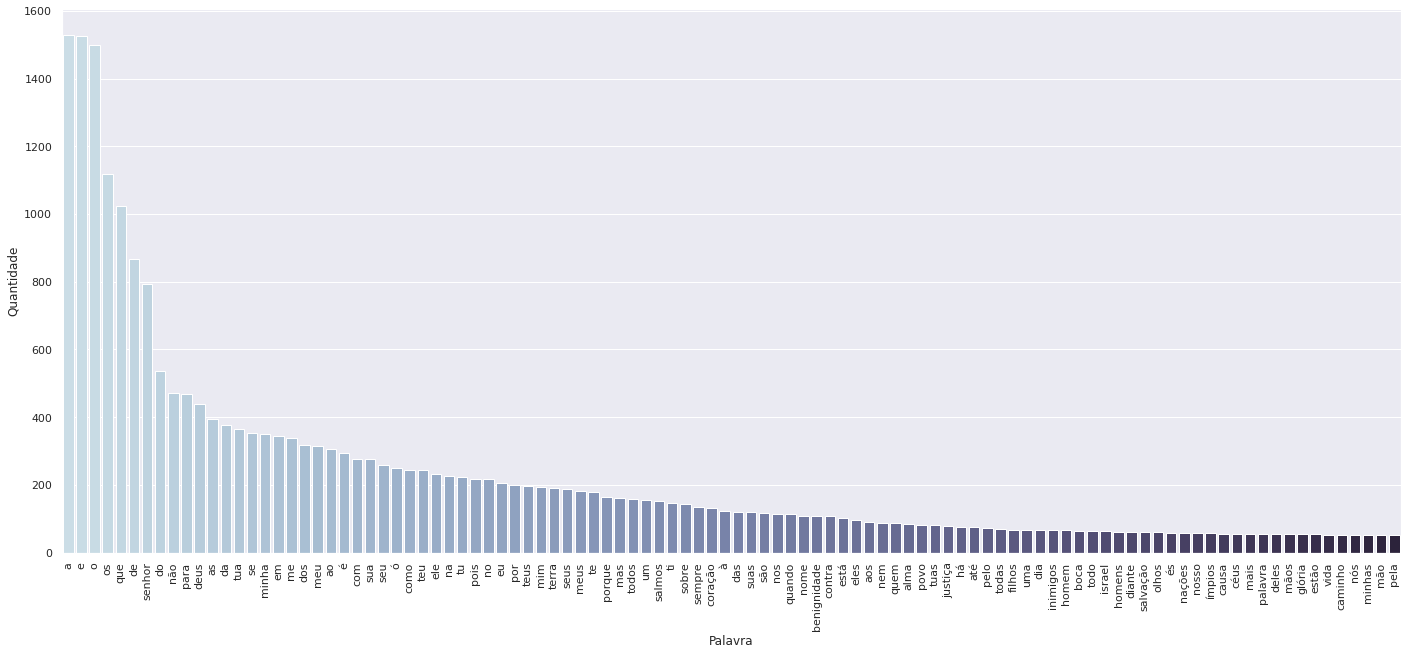

In [98]:
sns.set_theme(style='darkgrid') # Definindo a cor de fundo
plt.figure(figsize=(24,10)) # Definindo o tamanho do Dataframe
sns.barplot(x='Palavra', y='Quantidade', data=df, palette='ch:s=.25,rot=-.25') # Definindo os dados dos eixos x e y e a cor das barras
plt.xticks(rotation=90) # Alterando a posição dos nomes no gráfico
plt.show() # Plotando o gráfico

# **Conclusão**

Conclui-se que os cinco termos com maior frequência do livro de Salmos foram: *a*, *e*, *o*, *os* e *que*, onde os três primeiros diveram valores próximos, porém sendo a partir do terceiro termo a ter uma grande queda de frequência contrariando a Lei de Zipf, que diz que a palavra mais frequente ocorrerá aproximadamente duas vezes mais frequentemente do que a segunda palavra mais frequente, três vezes mais vezes que a terceira palavra mais frequente, e assim sucessivamente.